In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.decomposition import PCA
import pickle

In [3]:
data = pickle.load(open("./data/data_images_100_100.pickle",mode="rb"))

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,gender
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,gender
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,gender
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,gender
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,gender


## Eigen Face

In [5]:
# Mean face

X = data.drop('gender',axis=1).values



In [6]:
X.shape

(4555, 10000)

In [7]:
X

array([[0.7372549 , 0.71372549, 0.71372549, ..., 0.46666667, 0.45882353,
        0.43137255],
       [0.1254902 , 0.09019608, 0.12156863, ..., 0.14509804, 0.24705882,
        0.07058824],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.70196078, 0.70588235, 0.70588235, ..., 0.67058824, 0.69019608,
        0.72941176],
       [0.14901961, 0.14509804, 0.14509804, ..., 0.23921569, 0.25490196,
        0.26666667],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]])

In [8]:
mean_face = X.mean(axis=0) # flattern mean face

In [9]:
mean_face.shape

(10000,)

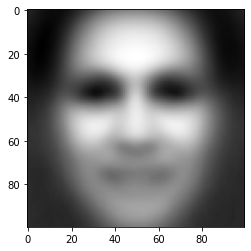

In [10]:
# Visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap="gray")
plt.show()

## substract data with mean face

In [11]:
X_t = X- mean_face # transformed data

** Apply X_t data to PCA**

- find the right nuber of component - Elbow
- with right number of component compute principal component

In [12]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [13]:
exp_var_df = pd.DataFrame()
exp_var_df["explained_var"] = pca.explained_variance_ratio_
exp_var_df["cum_explained_var"] = exp_var_df["explained_var"].cumsum()
exp_var_df["principal_components"] = np.arange(1,len(exp_var_df)+1)
exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.252588,0.252588,1
1,0.115090,0.367678,2
2,0.104164,0.471842,3
3,0.051754,0.523596,4
4,0.032961,0.556557,5


In [14]:
exp_var_df.set_index('principal_components',inplace=True)

<AxesSubplot:xlabel='principal_components'>

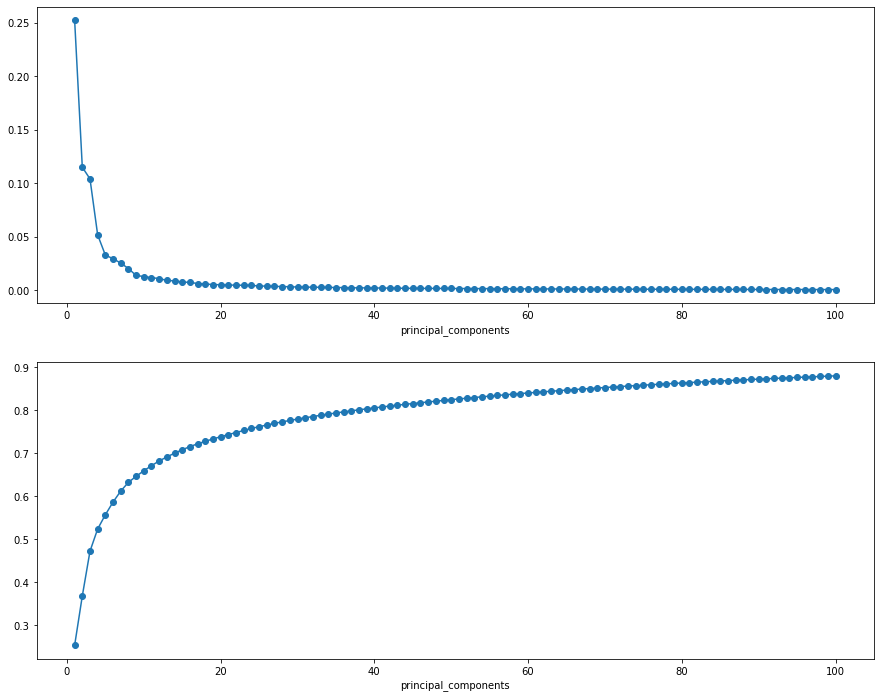

In [15]:
# visualization explained variance
fig,ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df["explained_var"].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df["cum_explained_var"].head(100).plot(kind='line',marker='o',ax=ax[1])

In [16]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [17]:
pca_data.shape

(4555, 50)

# saving data and models

In [18]:
y = data["gender"].values

In [19]:
np.savez("./data/data_pca_50_target",pca_data,y)

In [20]:
## saving the model
pca_dict = {'pca':pca_50,"mean_face":mean_face}

In [21]:
pickle.dump(pca_dict,open("model/pca_dict.pickle","wb"))

## Visualize Eigen Image

In [22]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [23]:
pca_data_inv.shape

(4555, 10000)

In [26]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

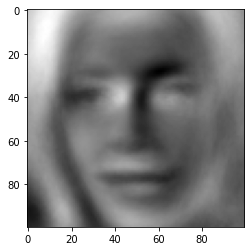

In [27]:
plt.imshow(eig_img,cmap='gray')
plt.show()